In [2]:
import os
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.applications import ResNet50 , ResNet101, ResNet152

In [6]:
# 한글 깨짐 방지
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
###################################################### 실행 안함. 자동완성용

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
######################################################

In [3]:
folder_list = os.listdir('/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train')
folder_list.remove('.DS_Store') 

data = []
pic_count = []

for folder_name in folder_list:
    folder_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train/' + folder_name
  
    image_list = os.listdir(folder_path)
    list_len = len(image_list)
    pic_count.append(list_len)
    
    for image_name in image_list:
        image_path = folder_path +'/' + image_name
        img = cv.imread(image_path)
        resize = cv.resize(img, (400,400), interpolation=cv.INTER_CUBIC)
        gray = cv.cvtColor(resize, cv.COLOR_BGR2GRAY)
        threshold, thresh = cv.threshold(gray,150, 255, cv.THRESH_BINARY)
        data.append(thresh)
        
answer = []
for idx, nm in enumerate(folder_list):
        answer += [nm] * pic_count[idx]

Text(0.5, 1.0, '훼손')

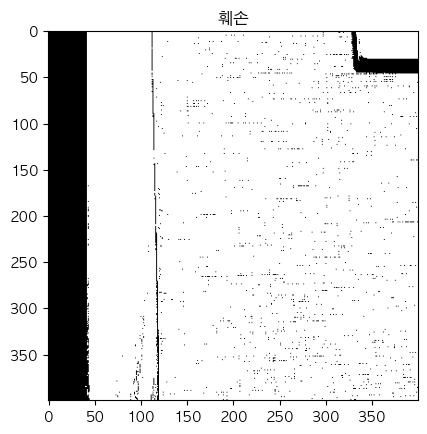

In [9]:
num = 3000
plt.imshow(data[num], cmap='gray')
plt.title(answer[num])

In [10]:
vcount = pd.DataFrame(answer).value_counts()
vcount = pd.DataFrame(vcount).reset_index().rename(columns={0 : 'class'})
fig = px.bar(vcount, x= vcount['class'], y=vcount['count'], text=vcount['count'])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8)

In [116]:
answer = np.array(answer)
answer = pd.get_dummies(answer)
answer = answer.values

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(data),answer,test_size=0.2, shuffle=True)
print(xtrain.shape)
print(xtest.shape)
xtrain = xtrain.reshape(2765,400,400,1).astype('float32')/255
xtest = xtest.reshape(692,400,400,1).astype('float32')/255

(2765, 400, 400)
(692, 400, 400)


In [118]:
model = Sequential()
model.add(ResNet50(weights=None, include_top=None, input_shape=(400,400,1)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(19, activation = 'softmax'))

model.summary()
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 13, 13, 2048)      23581440  
                                                                 
 flatten (Flatten)           (None, 346112)            0         
                                                                 
 dropout (Dropout)           (None, 346112)            0         
                                                                 
 dense (Dense)               (None, 19)                6576147   
                                                                 
Total params: 30,157,587
Trainable params: 30,104,467
Non-trainable params: 53,120
_________________________________________________________________


In [119]:
modelpath="resnet50_bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [120]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=True) 

datagen.fit(xtrain)

In [121]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=50), validation_data=(xtest, ytest), epochs = 200, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200


2023-05-11 16:15:47.305209: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


56/56 [==============================] - 487s 9s/step - loss: 44.4097 - accuracy: 0.2861 - val_loss: 1779.9940 - val_accuracy: 0.0246
Epoch 2/200
56/56 [==============================] - 464s 8s/step - loss: 9.4444 - accuracy: 0.3620 - val_loss: 74.4110 - val_accuracy: 0.3714
Epoch 3/200
56/56 [==============================] - 478s 9s/step - loss: 2.9996 - accuracy: 0.3808 - val_loss: 2.7424 - val_accuracy: 0.1792
Epoch 4/200
56/56 [==============================] - 502s 9s/step - loss: 2.3671 - accuracy: 0.4033 - val_loss: 2.3677 - val_accuracy: 0.2211
Epoch 5/200
56/56 [==============================] - 447s 8s/step - loss: 2.2138 - accuracy: 0.4051 - val_loss: 2.3369 - val_accuracy: 0.2269
Epoch 6/200
56/56 [==============================] - 476s 9s/step - loss: 2.0610 - accuracy: 0.4184 - val_loss: 2.2413 - val_accuracy: 0.2616
Epoch 7/200
56/56 [==============================] - 457s 8s/step - loss: 1.9759 - accuracy: 0.4159 - val_loss: 2.4918 - val_accuracy: 0.2225
Epoch 8/200
5

KeyboardInterrupt: 

In [19]:
my_model = load_model('resnet50_bestmodel.hdf5')
score = my_model.evaluate(xtest, ytest)
print('Test accuracy:', score[1])

22/22 [==============================] - 1s 39ms/step - loss: 2.9381 - accuracy: 0.4104
Test accuracy: 0.41040462255477905


In [ ]:
y_pred = model.predict(xtest)
y_pred_cls = np.argmax(y_pred,1)
y_true = np.argmax(ytest, axis=1)

cmat = confusion_matrix(y_true,y_pred_cls)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(cmat, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel('predicted label')
plt.ylabel('true label')

In [ ]:
# submit format /// 이미지 자체를 test 값으로 집어 넣을 경우의 code
# test.csv가 있기 때문에 이걸 이용해서 간단하게 경로를 지정해서 이미지를 변환 할 수도 있다.

test_data = []
test_folder_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/test/'

image_list = os.listdir(test_folder_path)
list_len = len(image_list)
pic_count.append(list_len)

for test_image_name in image_list:
    test_image_path = test_folder_path +'/' + test_image_name
    test_img = cv.imread(test_image_path)
    test_resize = cv.resize(test_img, (400,400), interpolation=cv.INTER_CUBIC)
    test_gray = cv.cvtColor(test_resize, cv.COLOR_BGR2GRAY)
    threshold, test_thresh = cv.threshold(test_gray,150, 255, cv.THRESH_BINARY)
    test_data.append(test_thresh)

        
final_pred = model.predict(np.array(test_data))

In [ ]:
final_test_pred=np.argmax(final_pred,axis=1)
final_test_pred

In [ ]:
submit=pd.read_csv('/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/sample_submission.csv')
submit.head()

In [ ]:

submit_result = pd.DataFrame({'id': submit['id'], 'label': final_test_pred})
submit_result.to_csv('submission.csv', index=False)

In [ ]:
# 다음 과제: open cv 를 이용하여 사진을 전처리한 후 원본 사진과 비교해 가면서 문제가 되는 지점이 제일 잘 보이는 전처리를 찾고 그것을 반영해보자
# 아니면 전처리할 경우에 포스트 잇 아예 제거하는 방법을 찾아보자